In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '/home/georgeos/Documents/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

In [3]:
from SyMBac.cell_geometry import get_vertices
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cell_verts = get_vertices(6,1,np.pi/2,40)
x_verts, y_verts = [_[0] for _ in cell_verts], [_[1] for _ in cell_verts]

In [5]:
x = np.linspace(1,10,10)
x[1:-1]

array([2., 3., 4., 5., 6., 7., 8., 9.])

(-0.5500000000000002, 0.5500000000000002, -3.3, 3.3)

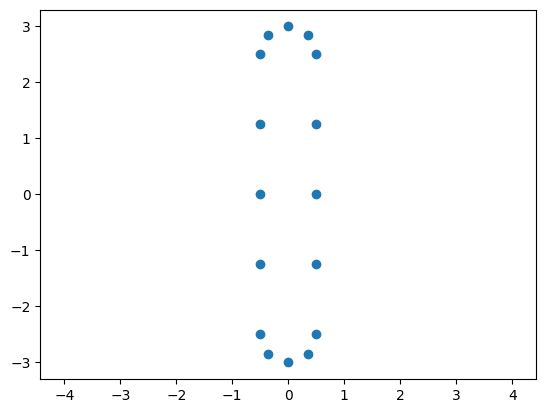

In [6]:
from SyMBac.cell_geometry import *
cell_length=6 
cell_width=1 
angle=np.pi/2
resolution=5
cell_verts = get_vertices(6,1,np.pi/2,resolution)
x_verts, y_verts = [_[0] for _ in cell_verts], [_[1] for _ in cell_verts]

plt.figure()
plt.scatter(x_verts, y_verts)
plt.axis('equal')

In [1]:
from SyMBac.cell_simulation import run_simulation, create_space, trench_creator, step_and_update
from SyMBac.cell import Cell
import numpy as np
from pymunk.pyglet_util import DrawOptions
import pymunk
import pyglet

In [2]:
gravity = 0 
pix_mic_conv = 0.065
trench_length = 20
trench_width = 1.1
cell_max_length = 4
cell_width = 1
max_length_var = 0
width_var = 0
lysis_p = 0
show_window = True
phys_iters = 10
sim_length = 1000
save_dir = "/tmp/"

space = create_space()
space.gravity = 0, gravity  # arbitrary units, negative is toward trench pole
#space.iterations = 1000
#space.damping = 0
#space.collision_bias = 0.0017970074436457143*10
space.collision_slop = 0.
dt = 1 / 100  # time-step per frame
scale_factor = 3 / pix_mic_conv # resolution scaling factor

trench_length = trench_length * scale_factor
trench_width = trench_width * scale_factor
trench_pos = (35, 0)
trench_creator(trench_width, trench_length, trench_pos, space)  # Coordinates of bottom left corner of the trench

in_trench = False
if in_trench:
    cell1_pos = (trench_pos[0]+0.5*trench_width,trench_pos[1]+0.1*trench_length)
else:
    cell1_pos = (trench_pos[0]+trench_width*3, trench_pos[1]+0.5*trench_length)

cell1 = Cell(
    length=cell_max_length/2 * scale_factor,
    width=cell_width * scale_factor,
    resolution=60,
    position=cell1_pos,
    angle=np.pi/2,
    space=space,
    max_length=cell_max_length * scale_factor,
    max_length_mean=cell_max_length * scale_factor,
    max_length_var=max_length_var * np.sqrt(scale_factor),
    width_var=width_var * np.sqrt(scale_factor),
    width_mean=cell_width * scale_factor,
    parent=None,
    lysis_p=lysis_p,
)

if show_window:

    window = pyglet.window.Window(700, 700, "SyMBac", resizable=True)
    options = DrawOptions()
    options.shape_outline_color = (10,20,30,40)
    @window.event
    def on_draw():
        window.clear()
        space.debug_draw(options)

    # key press event
    @window.event
    def on_key_press(symbol, modifier):

        # key "E" get press
        if symbol == pyglet.window.key.E:
            # close the window
            window.close()



x = [0]
cell_timeseries = []
cells = [cell1]
if show_window:
    pyglet.clock.schedule_interval(step_and_update, interval=dt, cells=cells, space=space, phys_iters=phys_iters,
                                   ylim=trench_length, cell_timeseries=cell_timeseries, x=x, sim_length=sim_length,
                                   save_dir=save_dir)
    pyglet.app.run()
else:
    for _ in tqdm(range(sim_length+2)):
        step_and_update(
            dt=dt, cells=cells, space=space, phys_iters=phys_iters, ylim=trench_length,
            cell_timeseries=cell_timeseries, x=x, sim_length=sim_length, save_dir=save_dir
        )


# window.close()
# phys_iters = phys_iters
# for x in tqdm(range(sim_length+250),desc="Simulation Progress"):
#    cells = step_and_update(dt=dt, cells=cells, space=space, phys_iters=phys_iters,ylim=trench_length*1.1, cell_timeseries = cell_timeseries, x=x, sim_length = sim_length, save_dir = save_dir)
#    if x > 250:
#        cell_timeseries.append(deepcopy(cells))

(-50.383581422617596,
 50.38358142261759,
 -25.384615384615383,
 25.384615384615383)

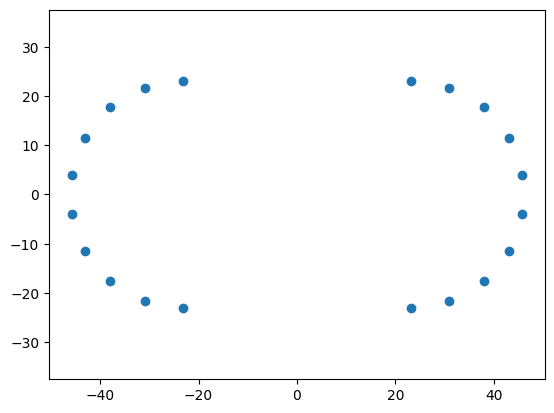

In [1]:
from SyMBac.cell_simulation import run_simulation, create_space, trench_creator, step_and_update2
from SyMBac.cell import Cell, Cell2
import numpy as np
from pymunk.pyglet_util import DrawOptions
import pymunk
import pyglet
import matplotlib.pyplot as plt
import numpy as np
gravity = 0 
pix_mic_conv = 0.065
trench_length = 20
trench_width = 1.1
cell_max_length = 4
cell_width = 1
max_length_var = 0
width_var = 0
lysis_p = 0
show_window = True
phys_iters = 10
sim_length = 1000
save_dir = "/tmp/"

space = create_space()
space.gravity = 0, gravity  # arbitrary units, negative is toward trench pole
#space.iterations = 1000
#space.damping = 0
#space.collision_bias = 0.0017970074436457143*10
space.collision_slop = 0.
dt = 1 / 100  # time-step per frame
scale_factor = 3 / pix_mic_conv # resolution scaling factor

trench_length = trench_length * scale_factor
trench_width = trench_width * scale_factor
trench_pos = (35, 0)
trench_creator(trench_width, trench_length, trench_pos, space)  # Coordinates of bottom left corner of the trench

in_trench = False
if in_trench:
    cell1_pos = (trench_pos[0]+0.5*trench_width,trench_pos[1]+0.1*trench_length)
else:
    cell1_pos = (trench_pos[0]+trench_width*3, trench_pos[1]+0.5*trench_length)

cell1: Cell2 = Cell2(
    length=cell_max_length/2 * scale_factor,
    width=cell_width * scale_factor,
    position=cell1_pos,
    self_id = 0,
    angle=np.pi/2,
    max_length=cell_max_length * scale_factor,
    mother_above_daughter=True,
)

cell_verts = cell1.geometry.get_vertices().tolist()
x_verts, y_verts = [_[0] for _ in cell_verts], [_[1] for _ in cell_verts]

plt.figure()
plt.scatter(x_verts, y_verts)
plt.axis('equal')

In [2]:
from SyMBac.cell_simulation import run_simulation, create_space, trench_creator, step_and_update2
from SyMBac.cell import Cell, Cell2
import numpy as np
from pymunk.pyglet_util import DrawOptions
import pymunk
import pyglet
gravity = 0 
pix_mic_conv = 0.065
trench_length = 20
trench_width = 1.1
cell_max_length = 4
cell_width = 1
max_length_var = 0
width_var = 0
lysis_p = 0
show_window = True
phys_iters = 10
sim_length = 1000
save_dir = "/tmp/"

space = create_space()
space.gravity = 0, gravity  # arbitrary units, negative is toward trench pole
#space.iterations = 1000
#space.damping = 0
#space.collision_bias = 0.0017970074436457143*10
space.collision_slop = 0.
dt = 1 / 100  # time-step per frame
scale_factor = 3 / pix_mic_conv # resolution scaling factor

trench_length = trench_length * scale_factor
trench_width = trench_width * scale_factor
trench_pos = (35, 0)
trench_creator(trench_width, trench_length, trench_pos, space)  # Coordinates of bottom left corner of the trench

in_trench = False
if in_trench:
    cell1_pos = (trench_pos[0]+0.5*trench_width,trench_pos[1]+0.1*trench_length)
else:
    cell1_pos = (trench_pos[0]+trench_width*3, trench_pos[1]+0.5*trench_length)

cell1 = Cell2(
    length=cell_max_length/2 * scale_factor,
    width=cell_width * scale_factor,
    position=cell1_pos,
    self_id = 0,
    angle=np.pi/2,
    max_length=cell_max_length * scale_factor,
    mother_above_daughter=True,
)

if show_window:

    window = pyglet.window.Window(700, 700, "SyMBac", resizable=True)
    options = DrawOptions()
    options.shape_outline_color = (10,20,30,40)
    @window.event
    def on_draw():
        window.clear()
        space.debug_draw(options)

    # key press event
    @window.event
    def on_key_press(symbol, modifier):

        # key "E" get press
        if symbol == pyglet.window.key.E:
            # close the window
            window.close()

space.add(cell1.body, cell1.shape)
sim_progress = [0]
cell_timeseries = []
cells = [cell1]
next_id = [cell1.self_id+1]
if show_window:
    pyglet.clock.schedule_interval(step_and_update2, interval=dt, cells=cells, space=space, phys_iters=phys_iters,
                                   ylim=trench_length, cell_timeseries=cell_timeseries, sim_progress=sim_progress, sim_length=sim_length,
                                   save_dir=save_dir, next_id=next_id)
    pyglet.app.run()
else:
    for _ in tqdm(range(sim_length+2)):
        step_and_update2(
            dt=dt, cells=cells, space=space, phys_iters=phys_iters, ylim=trench_length,
            cell_timeseries=cell_timeseries, x=x, sim_length=sim_length, save_dir=save_dir
        )